In [2]:
!gdown 1cDso6KQVUmfNh-LLbFjwUDSEAbT0p2dz

Downloading...
From (original): https://drive.google.com/uc?id=1cDso6KQVUmfNh-LLbFjwUDSEAbT0p2dz
From (redirected): https://drive.google.com/uc?id=1cDso6KQVUmfNh-LLbFjwUDSEAbT0p2dz&confirm=t&uuid=da08ab3c-3624-4c3a-acaf-671019bb4dd9
To: /content/Dataset of Tuberculosis Chest X-rays Images-20250507T062359Z-1-001.zip
100% 106M/106M [00:03<00:00, 34.6MB/s]


In [3]:
!unzip TB.zip

Streaming output truncated to the last 5000 lines.
  inflating: Dataset of Tuberculosis Chest X-rays Images/TB Chest X-rays/TB.2431.jpg  
  inflating: Dataset of Tuberculosis Chest X-rays Images/TB Chest X-rays/TB.297.jpg  
  inflating: Dataset of Tuberculosis Chest X-rays Images/TB Chest X-rays/TB.247.jpg  
  inflating: Dataset of Tuberculosis Chest X-rays Images/TB Chest X-rays/TB.2432.jpg  
  inflating: Dataset of Tuberculosis Chest X-rays Images/TB Chest X-rays/TB.2436.jpg  
  inflating: Dataset of Tuberculosis Chest X-rays Images/TB Chest X-rays/TB.2440.jpg  
  inflating: Dataset of Tuberculosis Chest X-rays Images/TB Chest X-rays/TB.2446.jpg  
  inflating: Dataset of Tuberculosis Chest X-rays Images/TB Chest X-rays/TB.242.jpg  
  inflating: Dataset of Tuberculosis Chest X-rays Images/TB Chest X-rays/TB.2434.jpg  
  inflating: Dataset of Tuberculosis Chest X-rays Images/TB Chest X-rays/TB.2439.jpg  
  inflating: Dataset of Tuberculosis Chest X-rays Images/TB Chest X-rays/TB.2471.j

Found 6488 images belonging to 2 classes.
Found 720 images belonging to 2 classes.
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 168s 679ms/step - accuracy: 0.6816 - loss: 0.5948 - val_accuracy: 0.9500 - val_loss: 0.1917
Epoch 2/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 88s 433ms/step - accuracy: 0.8960 - loss: 0.2718 - val_accuracy: 0.9667 - val_loss: 0.1330
Epoch 3/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 143s 439ms/step - accuracy: 0.9123 - loss: 0.2280 - val_accuracy: 0.9597 - val_loss: 0.1263
Epoch 4/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 91s 446ms/step - accuracy: 0.9291 - loss: 0.1917 - val_accuracy: 0.9639 - val_loss: 0.1162
Epoch 5/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 89s 436ms/step - accuracy: 0.9292 - loss: 0.1825 - val_accuracy: 0.9708 - val_loss: 0.1048
Epoch 6/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 88s 433ms/step - accuracy: 0.9305 - loss: 0.1776 - val_accuracy: 0.9722 - val_loss: 0.0992
Epoch 7/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 88s 432ms/step - accuracy: 0.9452 - loss: 0.1452 - val_accuracy: 0.9736 - val_loss: 0.0861
Epoch 8/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 90s 442ms/step - accuracy: 0.9482 - loss:

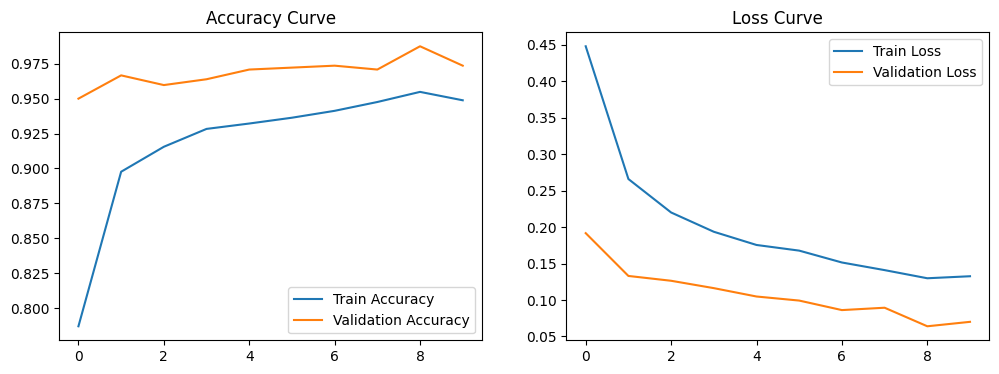

Found 7208 images belonging to 2 classes.
7208/7208 ━━━━━━━━━━━━━━━━━━━━ 150s 19ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4014
           1       0.96      0.96      0.96      3194

    accuracy                           0.96      7208
   macro avg       0.96      0.96      0.96      7208
weighted avg       0.96      0.96      0.96      7208



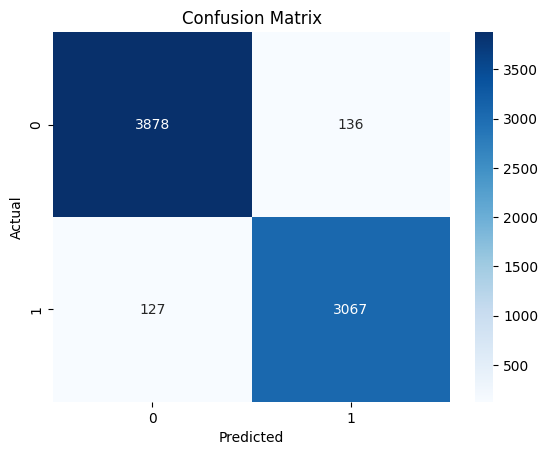

ROC-AUC Score: 0.99


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Dataset path
dataset_dir = "/content/Dataset_X_rays_Images"  # Replace if needed

# ImageDataGenerator with augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

# Load training and validation sets
batch_size = 32
img_size = (224, 224)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

# Load DenseNet121 without top layer
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze feature extractor

# Add custom classification layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

# Compile model
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

# Evaluate model on full dataset
test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = np.round(y_pred_probs)

# Classification metrics
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC Score
auc = roc_auc_score(y_true, y_pred_probs)
print(f"ROC-AUC Score: {auc:.2f}")


TB Chest X-rays - test: 100%|██████████| 320/320 [00:00<00:00, 6054.05it/s]

Found 5766 images belonging to 2 classes.
Found 720 images belonging to 2 classes.
Found 722 images belonging to 2 classes.


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


181/181 ━━━━━━━━━━━━━━━━━━━━ 75s 257ms/step - accuracy: 0.7590 - loss: 0.4930 - val_accuracy: 0.9569 - val_loss: 0.1612
Epoch 2/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - accuracy: 0.9414 - loss: 0.1789 - val_accuracy: 0.9597 - val_loss: 0.1137
Epoch 3/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 16s 90ms/step - accuracy: 0.9591 - loss: 0.1256 - val_accuracy: 0.9667 - val_loss: 0.0967
Epoch 4/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - accuracy: 0.9697 - loss: 0.1027 - val_accuracy: 0.9708 - val_loss: 0.0843
Epoch 5/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9700 - loss: 0.0851 - val_accuracy: 0.9667 - val_loss: 0.0817
Epoch 6/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 16s 88ms/step - accuracy: 0.9717 - loss: 0.0791 - val_accuracy: 0.9708 - val_loss: 0.0716
Epoch 7/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 16s 89ms/step - accuracy: 0.9739 - loss: 0.0784 - val_accuracy: 0.9736 - val_loss: 0.0670
Epoch 8/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9779 - loss: 0.0653 - val_accura

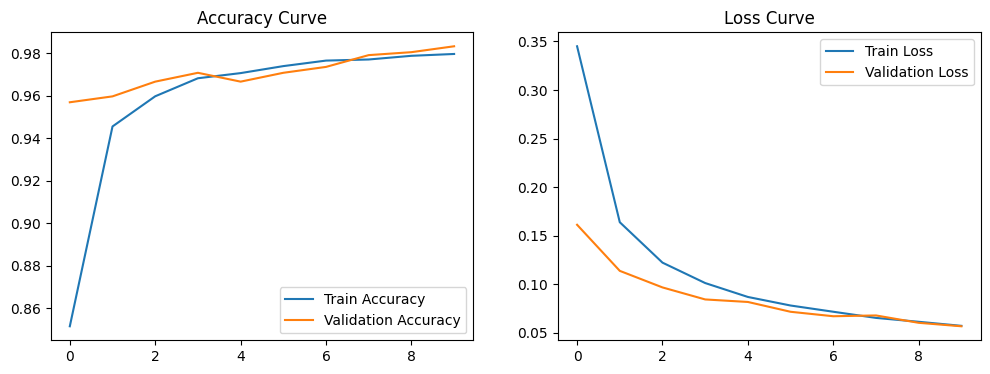

722/722 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       402
           1       0.99      0.97      0.98       320

    accuracy                           0.98       722
   macro avg       0.99      0.98      0.98       722
weighted avg       0.98      0.98      0.98       722



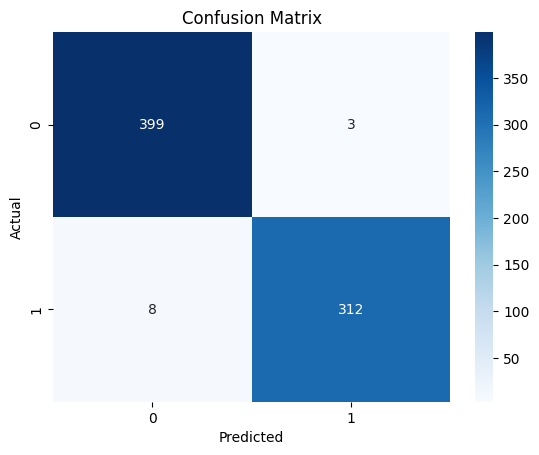

ROC-AUC Score: 1.00


In [6]:
import os
import shutil
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# ---------- STEP 1: SPLIT DATASET ----------
def split_dataset(source_dir, output_dir, train_split=0.8, val_split=0.1, test_split=0.1, seed=42):
    assert train_split + val_split + test_split == 1.0, "Splits must sum to 1.0"
    random.seed(seed)
    classes = os.listdir(source_dir)

    for cls in classes:
        cls_path = os.path.join(source_dir, cls)
        if not os.path.isdir(cls_path):
            continue

        images = os.listdir(cls_path)
        random.shuffle(images)

        total = len(images)
        train_end = int(train_split * total)
        val_end = train_end + int(val_split * total)

        splits = {
            'train': images[:train_end],
            'val': images[train_end:val_end],
            'test': images[val_end:]
        }

        for split_name, split_images in splits.items():
            split_dir = os.path.join(output_dir, split_name, cls)
            os.makedirs(split_dir, exist_ok=True)
            for img in tqdm(split_images, desc=f"{cls} - {split_name}"):
                shutil.copy(os.path.join(cls_path, img), os.path.join(split_dir, img))

# Paths
source_dir = "/content/Dataset_X_rays_Images"  # Original dataset
output_dir = "/content/TB_Chest_Radiography_Database_Split"  # New split dataset

# Only run once (comment after first run)
split_dataset(source_dir, output_dir)

# ---------- STEP 2: DATA LOADERS ----------
batch_size = 32
img_size = (224, 224)

datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = datagen.flow_from_directory(
    os.path.join(output_dir, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    os.path.join(output_dir, "val"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    os.path.join(output_dir, "test"),
    target_size=img_size,
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

# ---------- STEP 3: MODEL DEFINITION ----------
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze the base layers

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# ---------- STEP 4: TRAINING ----------
epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

# ---------- STEP 5: PLOTTING ----------
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

# ---------- STEP 6: EVALUATION ----------
y_true = test_generator.classes
y_probs = model.predict(test_generator)
y_pred = np.round(y_probs)

# Classification report
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC score
auc = roc_auc_score(y_true, y_probs)
print(f"ROC-AUC Score: {auc:.2f}")


TB Chest X-rays - test: 100%|██████████| 320/320 [00:00<00:00, 5799.85it/s]


Found 5766 images belonging to 2 classes.
Found 720 images belonging to 2 classes.
Found 722 images belonging to 2 classes.
258076736/258076736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


181/181 ━━━━━━━━━━━━━━━━━━━━ 184s 606ms/step - accuracy: 0.5260 - loss: 0.7038 - val_accuracy: 0.5569 - val_loss: 0.6896
Epoch 2/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 102s 269ms/step - accuracy: 0.5491 - loss: 0.6911 - val_accuracy: 0.5569 - val_loss: 0.6863
Epoch 3/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 47s 260ms/step - accuracy: 0.5479 - loss: 0.6894 - val_accuracy: 0.5569 - val_loss: 0.6863
Epoch 4/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 48s 263ms/step - accuracy: 0.5606 - loss: 0.6871 - val_accuracy: 0.5569 - val_loss: 0.6875
Epoch 5/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 52s 288ms/step - accuracy: 0.5530 - loss: 0.6870 - val_accuracy: 0.5569 - val_loss: 0.6865
Epoch 6/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 78s 267ms/step - accuracy: 0.5519 - loss: 0.6890 - val_accuracy: 0.5569 - val_loss: 0.6869
Epoch 7/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 47s 259ms/step - accuracy: 0.5618 - loss: 0.6851 - val_accuracy: 0.5569 - val_loss: 0.6867
Epoch 8/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 47s 261ms/step - accuracy: 0.5566 - loss: 0.6875 - v

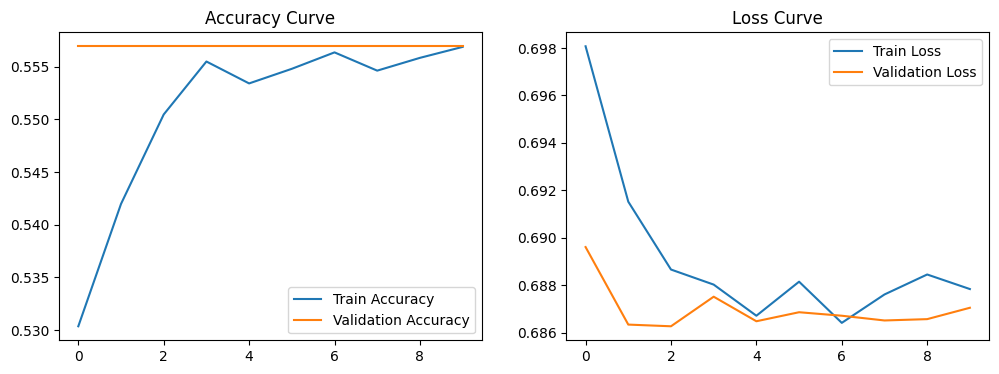

722/722 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.56      1.00      0.72       402
           1       0.00      0.00      0.00       320

    accuracy                           0.56       722
   macro avg       0.28      0.50      0.36       722
weighted avg       0.31      0.56      0.40       722



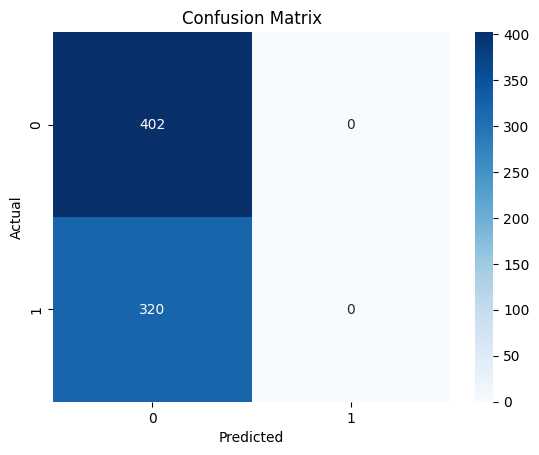

ROC-AUC Score: 0.77


In [5]:
import os
import shutil
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# ---------- STEP 1: SPLIT DATASET ----------
def split_dataset(source_dir, output_dir, train_split=0.8, val_split=0.1, test_split=0.1, seed=42):
    assert train_split + val_split + test_split == 1.0, "Splits must sum to 1.0"
    random.seed(seed)
    classes = os.listdir(source_dir)

    for cls in classes:
        cls_path = os.path.join(source_dir, cls)
        if not os.path.isdir(cls_path):
            continue

        images = os.listdir(cls_path)
        random.shuffle(images)

        total = len(images)
        train_end = int(train_split * total)
        val_end = train_end + int(val_split * total)

        splits = {
            'train': images[:train_end],
            'val': images[train_end:val_end],
            'test': images[val_end:]
        }

        for split_name, split_images in splits.items():
            split_dir = os.path.join(output_dir, split_name, cls)
            os.makedirs(split_dir, exist_ok=True)
            for img in tqdm(split_images, desc=f"{cls} - {split_name}"):
                shutil.copy(os.path.join(cls_path, img), os.path.join(split_dir, img))

# Paths
source_dir = "/content/Dataset_X_rays_Images"  # Original dataset
output_dir = "/content/Dataset_X_rays_Images_Split"  # New split dataset

# Only run once (comment after first run)
split_dataset(source_dir, output_dir)

# ---------- STEP 2: DATA LOADERS ----------
batch_size = 32
img_size = (224, 224)

datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = datagen.flow_from_directory(
    os.path.join(output_dir, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    os.path.join(output_dir, "val"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    os.path.join(output_dir, "test"),
    target_size=img_size,
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

# ---------- STEP 3: MODEL DEFINITION ----------
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze the base layers

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# ---------- STEP 4: TRAINING ----------
epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

# ---------- STEP 5: PLOTTING ----------
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

# ---------- STEP 6: EVALUATION ----------
y_true = test_generator.classes
y_probs = model.predict(test_generator)
y_pred = np.round(y_probs)

# Classification report
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC-AUC score
auc = roc_auc_score(y_true, y_probs)
print(f"ROC-AUC Score: {auc:.2f}")


TB Chest X-rays - test: 100%|██████████| 320/320 [00:00<00:00, 7266.01it/s]

Found 5766 images belonging to 2 classes.


Found 720 images belonging to 2 classes.
Found 722 images belonging to 2 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


181/181 ━━━━━━━━━━━━━━━━━━━━ 50s 188ms/step - accuracy: 0.7439 - loss: 0.5059 - val_accuracy: 0.9208 - val_loss: 0.2215
Epoch 2/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.9226 - loss: 0.2016 - val_accuracy: 0.9444 - val_loss: 0.1529
Epoch 3/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 15s 82ms/step - accuracy: 0.9399 - loss: 0.1591 - val_accuracy: 0.9389 - val_loss: 0.1458
Epoch 4/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.9500 - loss: 0.1319 - val_accuracy: 0.9556 - val_loss: 0.1261
Epoch 5/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.9607 - loss: 0.1140 - val_accuracy: 0.9611 - val_loss: 0.1197
Epoch 6/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.9563 - loss: 0.1176 - val_accuracy: 0.9528 - val_loss: 0.1194
Epoch 7/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.9658 - loss: 0.0951 - val_accuracy: 0.9597 - val_loss: 0.1137
Epoch 8/10
181/181 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.9690 - loss: 0.0990 - val_accura

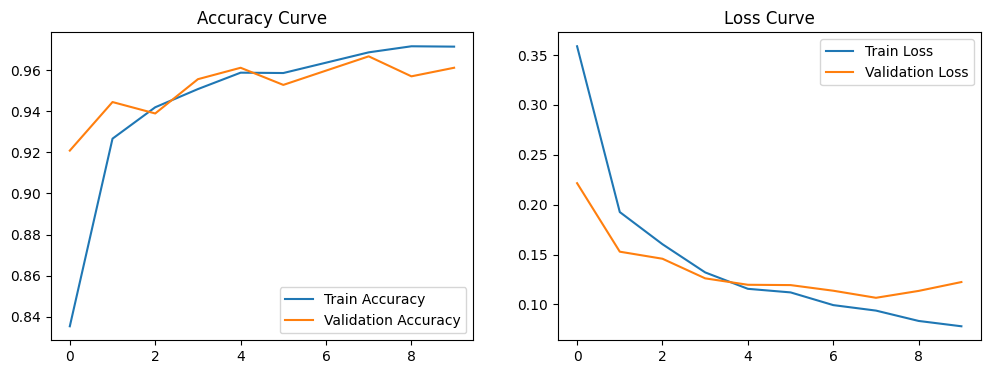

722/722 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       402
           1       0.98      0.89      0.93       320

    accuracy                           0.94       722
   macro avg       0.95      0.94      0.94       722
weighted avg       0.95      0.94      0.94       722



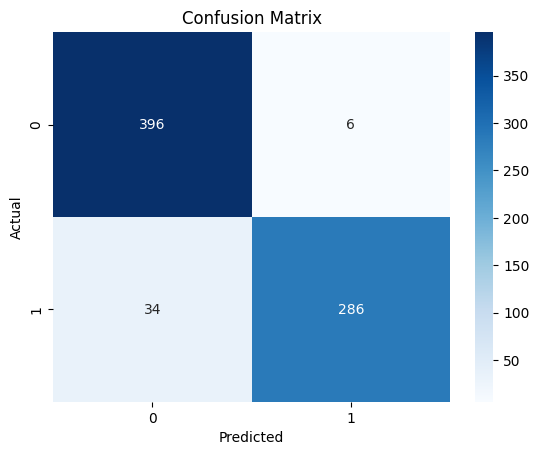

In [6]:
import os
import shutil
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# ---------- STEP 1: SPLIT DATASET ----------
def split_dataset(source_dir, output_dir, train_split=0.8, val_split=0.1, test_split=0.1, seed=42):
    assert train_split + val_split + test_split == 1.0, "Splits must sum to 1.0"
    random.seed(seed)
    classes = os.listdir(source_dir)

    for cls in classes:
        cls_path = os.path.join(source_dir, cls)
        if not os.path.isdir(cls_path):
            continue

        images = os.listdir(cls_path)
        random.shuffle(images)

        total = len(images)
        train_end = int(train_split * total)
        val_end = train_end + int(val_split * total)

        splits = {
            'train': images[:train_end],
            'val': images[train_end:val_end],
            'test': images[val_end:]
        }

        for split_name, split_images in splits.items():
            split_dir = os.path.join(output_dir, split_name, cls)
            os.makedirs(split_dir, exist_ok=True)
            for img in tqdm(split_images, desc=f"{cls} - {split_name}"):
                shutil.copy(os.path.join(cls_path, img), os.path.join(split_dir, img))

# Paths
source_dir = "/content/Dataset_X_rays_Images"  # Original dataset
output_dir = "/content/Dataset_X_rays_Images_Split"  # New split dataset

# Only run once (comment after first run)
split_dataset(source_dir, output_dir)

# ---------- STEP 2: DATA LOADERS ----------
batch_size = 32
img_size = (224, 224)

datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = datagen.flow_from_directory(
    os.path.join(output_dir, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = datagen.flow_from_directory(
    os.path.join(output_dir, "val"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    os.path.join(output_dir, "test"),
    target_size=img_size,
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

# ---------- STEP 3: MODEL DEFINITION ----------
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze the base layers

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# ---------- STEP 4: TRAINING ----------
epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

# ---------- STEP 5: PLOTTING ----------
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

# ---------- STEP 6: EVALUATION ----------
y_true = test_generator.classes
y_probs = model.predict(test_generator)
y_pred = np.round(y_probs)

# Classification report
print(classification_report(y_true, y_pred))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()